In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('../pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [8]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps','Insulin', 'BMI', 'Pedigree'] 

In [11]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min() ))

In [12]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [13]:
import tensorflow as tf

In [14]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [16]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [17]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [18]:
# if doing something with many possible "groups" 
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

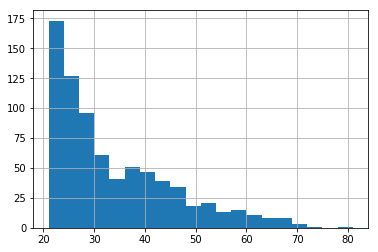

In [21]:
diabetes['Age'].hist(bins=20)

In [23]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [24]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [25]:
#TRAIN TEST SPLIT

In [26]:
x_data = diabetes.drop('Class', axis = 1)

In [27]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [28]:
labels = diabetes['Class']

In [31]:
# labels

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.3, random_state = 101)

In [34]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size = 10, num_epochs = 1000, shuffle = True)

In [35]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes= 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/zz/zyxvpxvq6csfxvn_n0002d4m000l95/T/tmpt8fw9co5', '_tf_random_seed': 1, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_secs': 600, '_save_summary_steps': 100}


In [36]:
model.train(input_fn=input_func, steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/zz/zyxvpxvq6csfxvn_n0002d4m000l95/T/tmpt8fw9co5/model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 361.157
INFO:tensorflow:loss = 6.77511, step = 101 (0.278 sec)
INFO:tensorflow:global_step/sec: 373.126
INFO:tensorflow:loss = 5.86844, step = 201 (0.268 sec)
INFO:tensorflow:global_step/sec: 408.617
INFO:tensorflow:loss = 4.64629, step = 301 (0.245 sec)
INFO:tensorflow:global_step/sec: 384.534
INFO:tensorflow:loss = 6.09841, step = 401 (0.260 sec)
INFO:tensorflow:global_step/sec: 414.195
INFO:tensorflow:loss = 5.95107, step = 501 (0.241 sec)
INFO:tensorflow:global_step/sec: 408.36
INFO:tensorflow:loss = 7.302, step = 601 (0.245 sec)
INFO:tensorflow:global_step/sec: 370.531
INFO:tensorflow:loss = 5.4905, step = 701 (0.270 sec)
INFO:tensorflow:global_step/sec: 298.837
INFO:tensorflow:loss = 5.71496, step = 801 (0.335 sec)
INFO:tensorflow:global_step/sec:

In [37]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y = y_test, batch_size = 10, num_epochs = 1, shuffle = False)

In [38]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-12-05-00:12:13
INFO:tensorflow:Restoring parameters from /var/folders/zz/zyxvpxvq6csfxvn_n0002d4m000l95/T/tmpt8fw9co5/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-12-05-00:12:13
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74026, accuracy_baseline = 0.649351, auc = 0.802304, auc_precision_recall = 0.644029, average_loss = 0.526521, global_step = 1000, label/mean = 0.350649, loss = 5.06777, prediction/mean = 0.381664


In [39]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80230445,
 'auc_precision_recall': 0.64402908,
 'average_loss': 0.52652127,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0677671,
 'prediction/mean': 0.38166359}

In [42]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test,
                                                      batch_size=10,
                                                      num_epochs=1,
                                                      shuffle = False)

In [45]:
predictions = model.predict(pred_input_func)

In [46]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from /var/folders/zz/zyxvpxvq6csfxvn_n0002d4m000l95/T/tmpt8fw9co5/model.ckpt-1000


In [47]:
my_pred

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.54597116], dtype=float32),
  'logits': array([ 0.18440545], dtype=float32),
  'probabilities': array([ 0.45402884,  0.54597116], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.65194827], dtype=float32),
  'logits': array([ 0.62761402], dtype=float32),
  'probabilities': array([ 0.34805176,  0.65194827], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.40401816], dtype=float32),
  'logits': array([-0.38875031], dtype=float32),
  'probabilities': array([ 0.59598184,  0.40401819], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.36723775], dtype=float32),
  'logits': array([-0.5440852], dtype=float32),
  'probabilities': array([ 0.63276225,  0.36723778], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array

In [48]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],
                                       feature_columns=feat_cols,
                                      n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/zz/zyxvpxvq6csfxvn_n0002d4m000l95/T/tmp1my7ilf_', '_tf_random_seed': 1, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_secs': 600, '_save_summary_steps': 100}


In [50]:
dnn_model.train(input_fn=input_func,
                steps=100)

ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _HashedCategoricalColumn(key='Group', hash_bucket_size=10, dtype=tf.string)

In [52]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group,
                                                        dimension=4)

In [57]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [58]:
imput_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size = 10, num_epochs = 1000, shuffle = True)

In [64]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10], feature_columns = feat_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/zz/zyxvpxvq6csfxvn_n0002d4m000l95/T/tmp5abyiutg', '_tf_random_seed': 1, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_secs': 600, '_save_summary_steps': 100}


In [65]:
dnn_model.train(input_fn=input_func, steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/zz/zyxvpxvq6csfxvn_n0002d4m000l95/T/tmp5abyiutg/model.ckpt.
INFO:tensorflow:loss = 6.87585, step = 1
INFO:tensorflow:global_step/sec: 407.666
INFO:tensorflow:loss = 4.79461, step = 101 (0.245 sec)
INFO:tensorflow:global_step/sec: 402.345
INFO:tensorflow:loss = 4.45481, step = 201 (0.248 sec)
INFO:tensorflow:global_step/sec: 356.509
INFO:tensorflow:loss = 4.95243, step = 301 (0.280 sec)
INFO:tensorflow:global_step/sec: 379.8
INFO:tensorflow:loss = 5.14011, step = 401 (0.263 sec)
INFO:tensorflow:global_step/sec: 439.845
INFO:tensorflow:loss = 3.53489, step = 501 (0.228 sec)
INFO:tensorflow:global_step/sec: 420.743
INFO:tensorflow:loss = 6.15281, step = 601 (0.237 sec)
INFO:tensorflow:global_step/sec: 359.388
INFO:tensorflow:loss = 3.64511, step = 701 (0.278 sec)
INFO:tensorflow:global_step/sec: 382.756
INFO:tensorflow:loss = 6.01507, step = 801 (0.263 sec)
INFO:tensorflow:global_step/se

In [66]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size = 10, num_epochs=1, shuffle=False)

In [67]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-12-05-00:27:36
INFO:tensorflow:Restoring parameters from /var/folders/zz/zyxvpxvq6csfxvn_n0002d4m000l95/T/tmp5abyiutg/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-12-05-00:27:37
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.770563, accuracy_baseline = 0.649351, auc = 0.825803, auc_precision_recall = 0.708256, average_loss = 0.491743, global_step = 1000, label/mean = 0.350649, loss = 4.73303, prediction/mean = 0.318786


{'accuracy': 0.77056277,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82580256,
 'auc_precision_recall': 0.70825624,
 'average_loss': 0.49174336,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.7330298,
 'prediction/mean': 0.31878591}